### Garch Model

In [1]:
# Configuration
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


In [2]:
# Load some data
import pandas as pd
import time
from datetime import datetime

ticker = '^GSPC'
period1 = int(time.mktime(datetime(2015, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.now().timetuple()))
interval = '1d' # 1d, 1m

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

SP_500 = pd.read_csv(query_string)
SP_500.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000


In [3]:
# Format the data particularity for StatsForecast: "unique_id" column, "ds" datastamp column and "y" numeric representations column. In general, you might have more than one series in this way, that shares the same id.

# Here we just need to add some column and change the names
df=SP_500[["Date","Close"]]
df["unique_id"] ="1"
df.columns= ["ds","y","unique_id"]
# Convert ds to time 
df["ds"]=pd.to_datetime(df["ds"])
display(df.head())
display(df.dtypes)

C:\Users\zeroi\AppData\Local\Temp\ipykernel_1240\634555407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["unique_id"] ="1"
C:\Users\zeroi\AppData\Local\Temp\ipykernel_1240\634555407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ds"]=pd.to_datetime(df["ds"])


,ds,y,unique_id
0,2015-01-02,2058.199951,1
1,2015-01-05,2020.579956,1
2,2015-01-06,2002.609985,1
3,2015-01-07,2025.900024,1
4,2015-01-08,2062.139893,1


ds           datetime64[ns]
y                   float64
unique_id            object
dtype: object

In [119]:
# Here an example with more than one data set: First let's get the data in typical format
import fredapi
import pandas as pd
API_KEY = "c33d17d6ad546cfc58302d8906a42ece"
fred = fredapi.Fred(API_KEY)
id_list = ["UNRATE","GDP"]
names_of_variables = [fred.search(i).title[0] for i in id_list]
dictionary_of_variables = dict(zip(names_of_variables,id_list))
data = pd.DataFrame({name:pd.Series(fred.get_series(id,aggregation_method="avg",frequency="q")) for name, id in dictionary_of_variables.items()}).dropna()


In [125]:
# Now lets do get the data in SatatsForecast format
# Drop the index so that you get a date column-->index
data_with_index_column=data.reset_index()
display(data_with_index_column.head())
# Melt the data
melted_data = pd.melt(data_with_index_column,
                      id_vars=["index"], # This are the columns you want to mantain as columns, though as repeted values 
                      var_name=["unique_id"] # This is the name of the column that will have the previous columns not included above as id
                      )
df_2=melted_data
df_2

,index,Unemployment Rate,Federal Debt: Total Public Debt as Percent of Gross Domestic Product
0,1948-01-01,3.7,265.742
1,1948-04-01,3.7,272.567
2,1948-07-01,3.8,279.196
3,1948-10-01,3.8,280.366
4,1949-01-01,4.7,275.034


,index,unique_id,value
0,1948-01-01,Unemployment Rate,3.700
1,1948-04-01,Unemployment Rate,3.700
2,1948-07-01,Unemployment Rate,3.800
3,1948-10-01,Unemployment Rate,3.800
4,1949-01-01,Unemployment Rate,4.700
...,...,...,...
603,2022-10-01,Federal Debt: Total Public Debt as Percent of ...,26408.405
604,2023-01-01,Federal Debt: Total Public Debt as Percent of ...,26813.601
605,2023-04-01,Federal Debt: Total Public Debt as Percent of ...,27063.012
606,2023-07-01,Federal Debt: Total Public Debt as Percent of ...,27610.128


In [127]:
# Simpler tutorial to convert the data in neet format
import pandas as pd

# Sample dataframe
data = {
    'date': ['2024-01-01', '2024-01-02', '2024-01-03'],
    'series1': [10, 20, 30],
    'series2': [15, 25, 35]
}

df = pd.DataFrame(data)
print(df)
# Melt the dataframe
melted_df = pd.melt(df, id_vars=['date'], var_name='ID', value_name='value')

# Rename the columns to match your requirement
melted_df.columns = ['timestamp', 'ID', 'value']

print(melted_df)

         date  series1  series2
0  2024-01-01       10       15
1  2024-01-02       20       25
2  2024-01-03       30       35
    timestamp       ID  value
0  2024-01-01  series1     10
1  2024-01-02  series1     20
2  2024-01-03  series1     30
3  2024-01-01  series2     15
4  2024-01-02  series2     25
5  2024-01-03  series2     35


c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


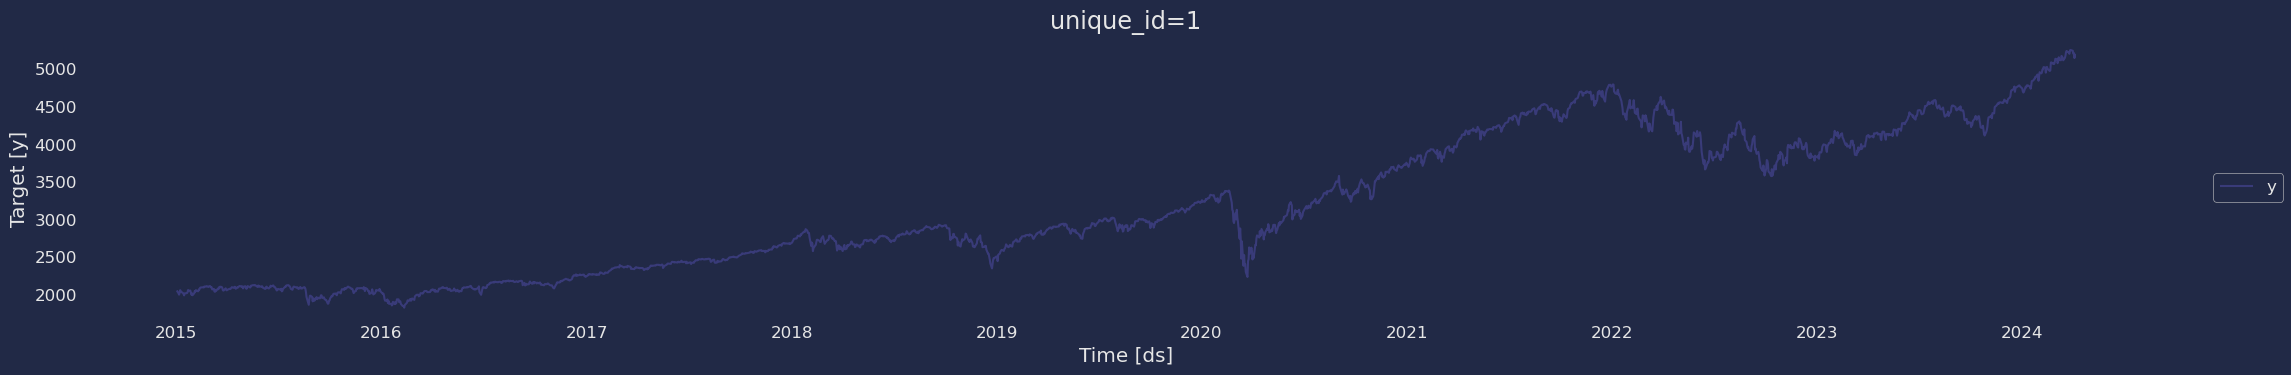

In [4]:
# Continue--> Explore data
from statsforecast import StatsForecast
StatsForecast.plot(df)

In [5]:
# Take first difference of the data---> the return column
df['return'] = 100 * df["y"].pct_change()
df.dropna(inplace=True, how='any')
import plotly.express as px
fig = px.line(df, x=df["ds"], y="return",title="SP500 Return Chart",template = "plotly_dark")
fig.show()
df.head()


C:\Users\zeroi\AppData\Local\Temp\ipykernel_1240\1604898816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = 100 * df["y"].pct_change()
C:\Users\zeroi\AppData\Local\Temp\ipykernel_1240\1604898816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True, how='any')


,ds,y,unique_id,return
1,2015-01-05,2020.579956,1,-1.827811
2,2015-01-06,2002.609985,1,-0.889347
3,2015-01-07,2025.900024,1,1.162984
4,2015-01-08,2062.139893,1,1.788828
5,2015-01-09,2044.810059,1,-0.840381


In [148]:
# Some nice graphs
df['sq_return'] = df["return"].mul(df["return"])

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=df["ds"], y=df["return"],
                         mode='lines',
                         name='return'),
row=1, col=1
)


fig.add_trace(go.Scatter(x=df["ds"], y=df["sq_return"],
                         mode='lines',
                         name='sq_return'), 
    row=1, col=2
)

fig.update_layout(height=600, width=800, title_text="Returns vs Squared Returns", template = "plotly_dark")
fig.show()


C:\Users\zeroi\AppData\Local\Temp\ipykernel_20492\2073961269.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



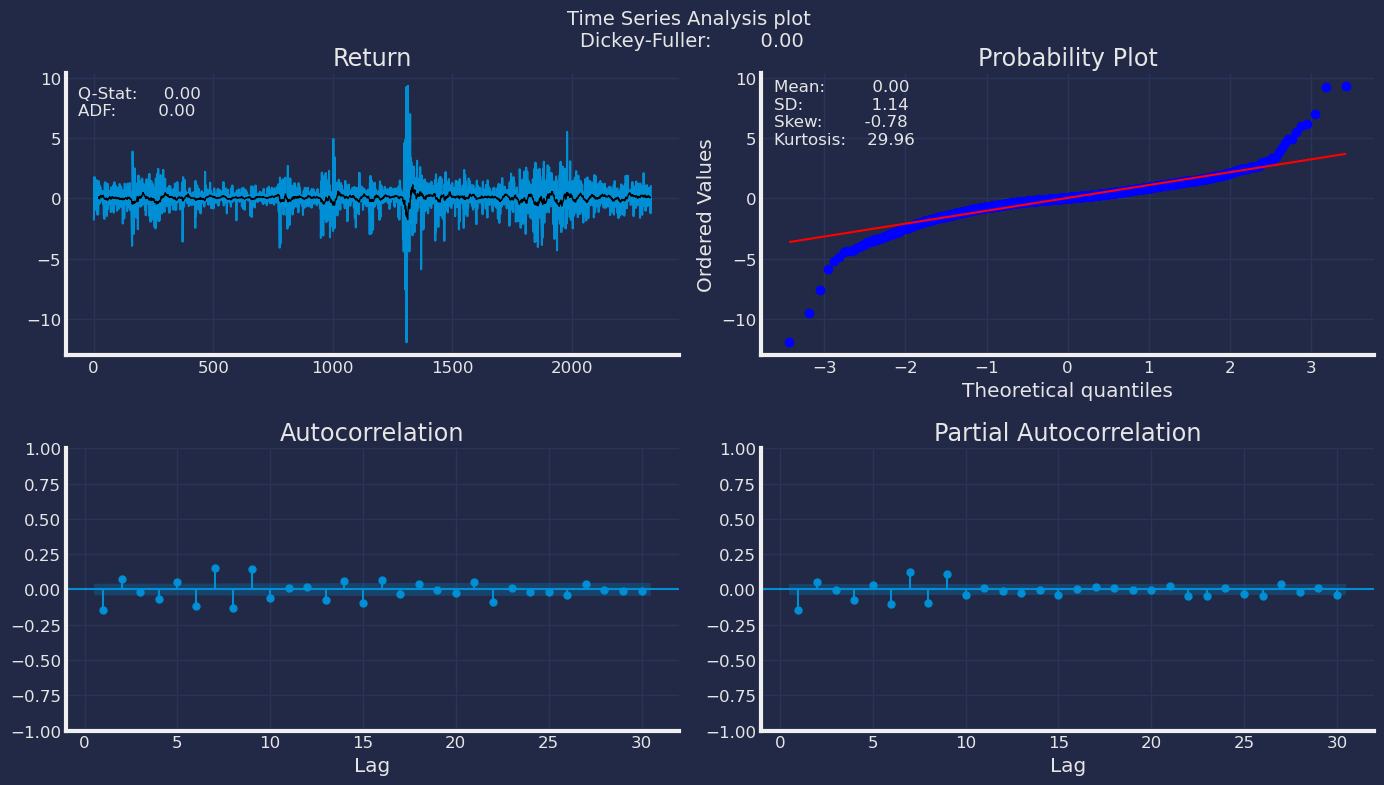

In [6]:
# More nice graphs
from scipy.stats import probplot, moment
from statsmodels.tsa.stattools import adfuller, q_stat, acf
import numpy as np
import seaborn as sns

def plot_correlogram(x, lags=None, title=None):    
    lags = min(10, int(len(x)/5)) if lags is None else lags
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    x.plot(ax=axes[0][0], title='Return')
    x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
    q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
    stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
    axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
    probplot(x, plot=axes[0][1])
    mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
    s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
    axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
    plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
    plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
    axes[1][0].set_xlabel('Lag')
    axes[1][1].set_xlabel('Lag')
    fig.suptitle(title+ f'Dickey-Fuller: {adfuller(x)[1]:>11.2f}', fontsize=14)
    sns.despine()
    fig.tight_layout()
    fig.subplots_adjust(top=.9)
plot_correlogram(df["return"], lags=30, title="Time Series Analysis plot \n")


In [7]:
# Divide data into training and testing
df=df[["ds","unique_id","return"]]
df.columns=["ds", "unique_id", "y"]
train = df[df.ds<='2023-05-31'] # Let's forecast the last 30 days
test = df[df.ds>'2023-05-31']
train.shape, test.shape


((2116, 3), (213, 3))

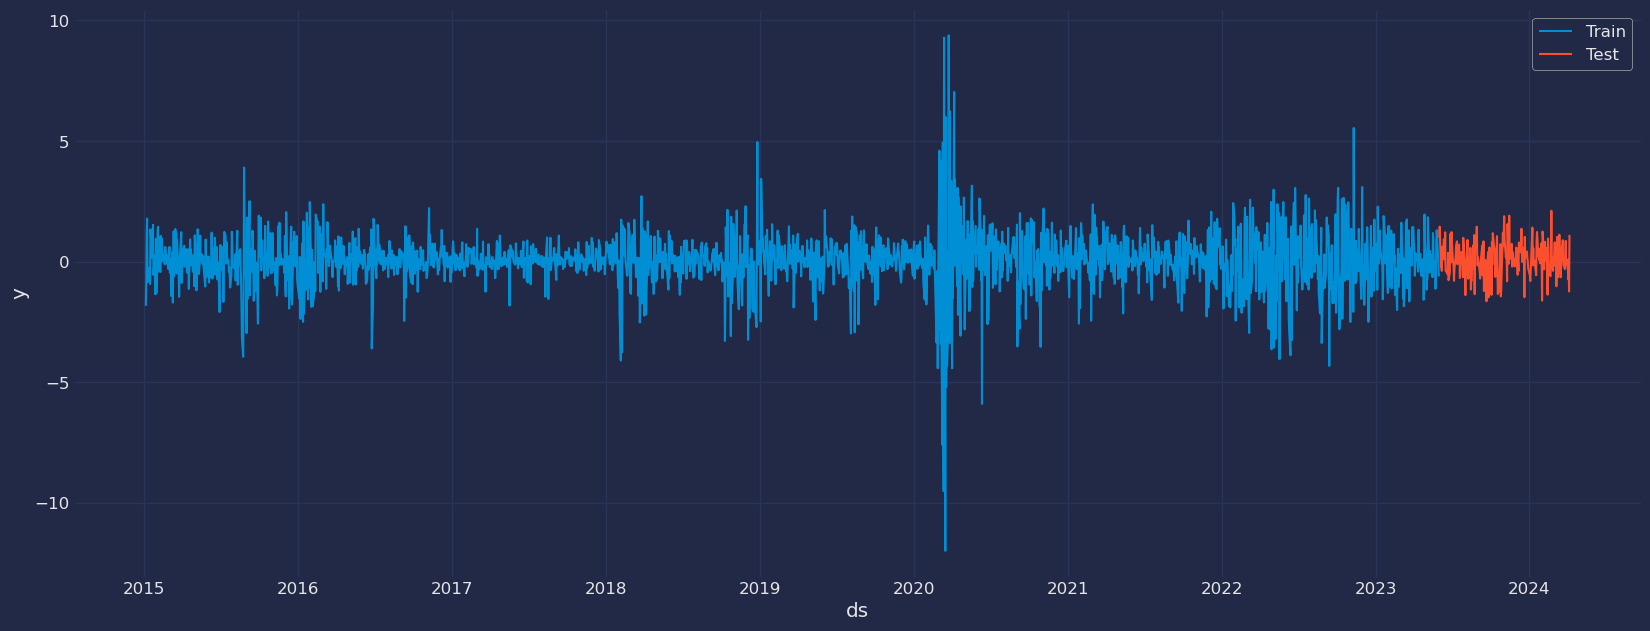

In [8]:
# Plot training and testing data
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()


#### Now, here we do the GARCH

In [9]:
# Models to use
from statsforecast import StatsForecast 
from statsforecast.models import GARCH # or any other model
season_length = 7 # Dayly data 
horizon = len(test) # number of predictions biasadj=True, include_drift=True,

models = [GARCH(1,1),
          GARCH(1,2),
          GARCH(2,2),
          GARCH(2,1),
          GARCH(3,1),
          GARCH(3,2),
          GARCH(3,3), 
          GARCH(1,3), 
          GARCH(2,3)]


In [11]:
# Test to see which model is the best
sf = StatsForecast(models=models,
                   freq='C', # custom business day frequency
                   n_jobs=-1)

crossvalidation_df = sf.cross_validation(df=train,
                                         h=horizon,# steps into the future to forecast, in this case 12
                                         step_size=6, # how open do you want to forecast those h steps--> each 6 times
                                         n_windows=5 # Basically, it splits the data into 5 windows. Then it trains the model in window 1, and make predictions in it. Then it trains the model in window 2...
                                         ) 
crossvalidation_df

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\statsforecast\core.py:417: FutureWarning:

In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.



,ds,cutoff,y,"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)","GARCH(3,1)","GARCH(3,2)","GARCH(3,3)","GARCH(1,3)","GARCH(2,3)"
unique_id,,,,,,,,,,,,
1,2022-06-22,2022-06-21,-0.130157,3.374939,3.409752,3.363836,3.376146,3.512938,3.350235,3.523169,2.968939,3.308512
1,2022-06-23,2022-06-21,0.953222,-1.456610,-1.481868,-1.455973,-1.452635,-1.480880,-1.457997,-1.496650,-1.222351,-1.471602
1,2022-06-24,2022-06-21,3.056329,-1.155310,-1.144668,-1.163677,-1.187400,-1.174303,-1.172524,-1.118480,-0.806308,-1.138217
1,2022-06-27,2022-06-21,-0.297307,-2.132692,-2.129926,-2.134892,-2.171000,-2.273483,-2.136562,-2.250006,-1.570391,-2.078303
1,2022-06-28,2022-06-21,-2.014304,1.726593,1.745594,1.725403,1.730053,1.810444,1.724973,1.805556,1.379416,1.722168
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2023-05-24,2022-07-26,-0.731860,-1.432600,-1.433218,-1.455467,-1.505992,-1.487969,-1.487150,-1.403434,-1.452019,-1.432870
1,2023-05-25,2022-07-26,0.875758,2.556937,2.577393,2.581617,2.668829,2.719045,2.705383,2.567503,2.586807,2.537644
1,2023-05-26,2022-07-26,1.304909,-0.534040,-0.546848,-0.536988,-0.550837,-0.563849,-0.559349,-0.537281,-0.547888,-0.534438


In [13]:
# Compute the distinct RMSE of the models
from datasetsforecast.losses import rmse

def compute_cv_rmse(crossvalidation_df):
    """Compute MAE for all models generated"""
    res = {}
    for mod in models: 
        res[mod] = rmse(crossvalidation_df['actual'], crossvalidation_df[str(mod)])
    return pd.Series(res)
crossvalidation_df.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 
rmse_cv = crossvalidation_df.groupby(['unique_id', 'cutoff']).apply(compute_cv_rmse)

mae = rmse_cv.groupby('unique_id').mean()
mae.style.highlight_min(color = 'red', axis = 1)

,"GARCH(1,1)","GARCH(1,2)","GARCH(2,2)","GARCH(2,1)","GARCH(3,1)","GARCH(3,2)","GARCH(3,3)","GARCH(1,3)","GARCH(2,3)"
unique_id,,,,,,,,,
1,1.529090,1.629505,1.690319,1.533398,1.684417,1.531735,1.531468,1.654826,1.607392


In [20]:
def plot_forecasts(y_hist, y_true, y_pred, models):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    y_true = y_true.merge(y_pred, how='left', on=['unique_id', 'ds'])
    df_plot = pd.concat([y_hist, y_true]).set_index('ds').tail(12*10)
    df_plot[['y'] + models].plot(ax=ax, linewidth=2 )
    colors = ['green']
  # Specify graph features:
    ax.fill_between(df_plot.index, 
                df_plot['GARCH(1,1)-lo-80'], 
                df_plot['GARCH(1,1)-hi-80'],
                alpha=.20,
                color='lime',
                label='GARCH(1,1)_level_80')
    ax.fill_between(df_plot.index, 
                df_plot['GARCH(1,1)-lo-95'], 
                df_plot['GARCH(1,1)-hi-95'],
                alpha=.2,
                color='white',
                label='GARCH(1,1)_level_95')
    ax.set_title('', fontsize=22)
    ax.set_ylabel("Return", fontsize=20)
    ax.set_xlabel('Month-Days', fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid(True)
    plt.show()
forecast_df = sf.predict(h=horizon, level=[80,95]) 

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\utilsforecast\processing.py:360: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\utilsforecast\processing.py:407: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\utilsforecast\processing.py:407: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\utilsforecast\processing.py:407: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\utilsforecast\processing.py:407: PerformanceWarning:

Non-vectorized DateOffset being applied to Series or DatetimeIndex.

c:\Users\zeroi\miniconda3\envs\eco\lib\site-packages\utilsforecast\processing.py:407: PerformanceWarning:

Non-vectorize

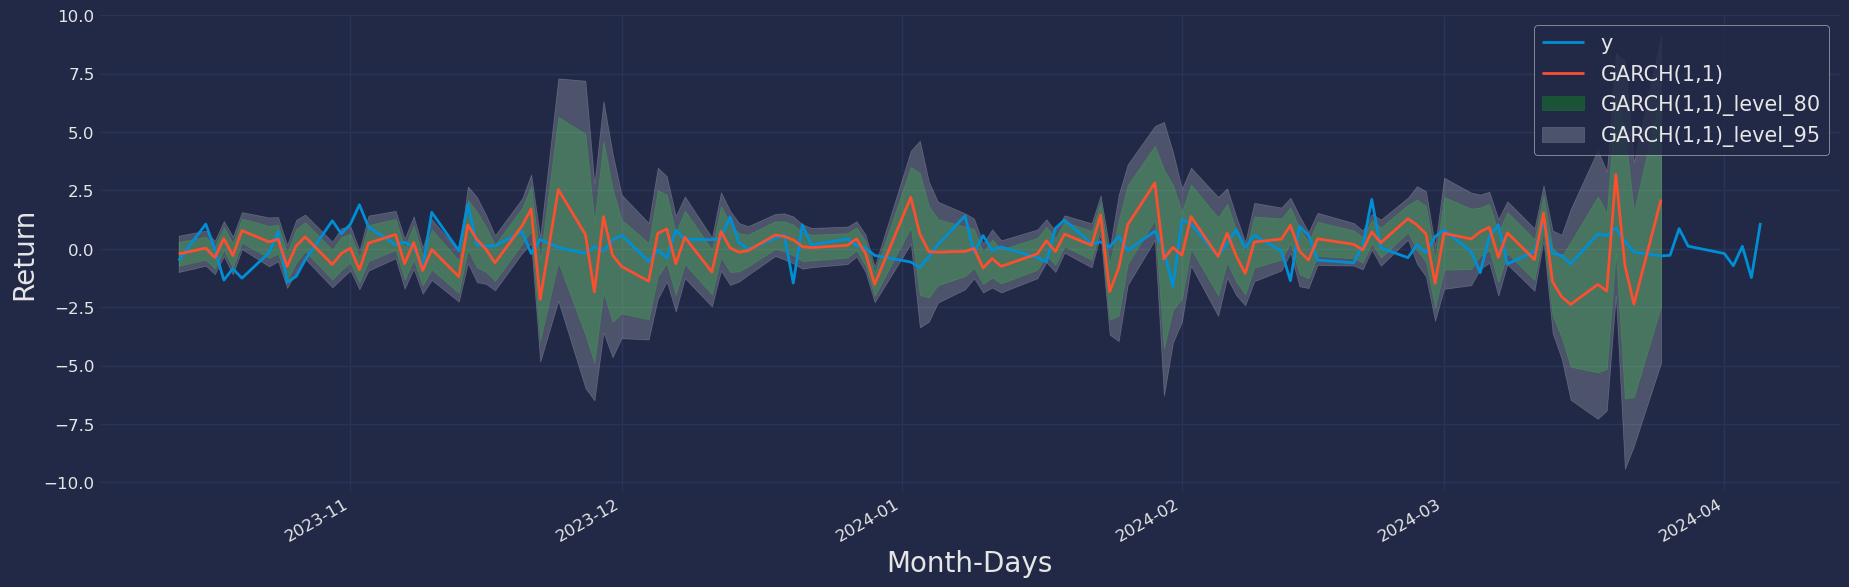

In [21]:
plot_forecasts(train, test, forecast_df, models=["GARCH(1,1)" ])
